<a href="https://colab.research.google.com/github/annaklaracss/data_science-/blob/main/Data_Science_testando_hip%C3%B3teses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# carregando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#Leitura dos dados

# idade de aponsentadoria
dados_idade_aposentadoria = pd.read_csv("/content/dados_idade_aposentadoria.csv")

# Tempo de Vida de uma Lâmpada
dados_vida_lampada = pd.read_csv("/content/dados_vida_lampada.csv")

# Altura dos funcionarios
dados_alturas = pd.read_csv("/content/dados_alturas.csv")

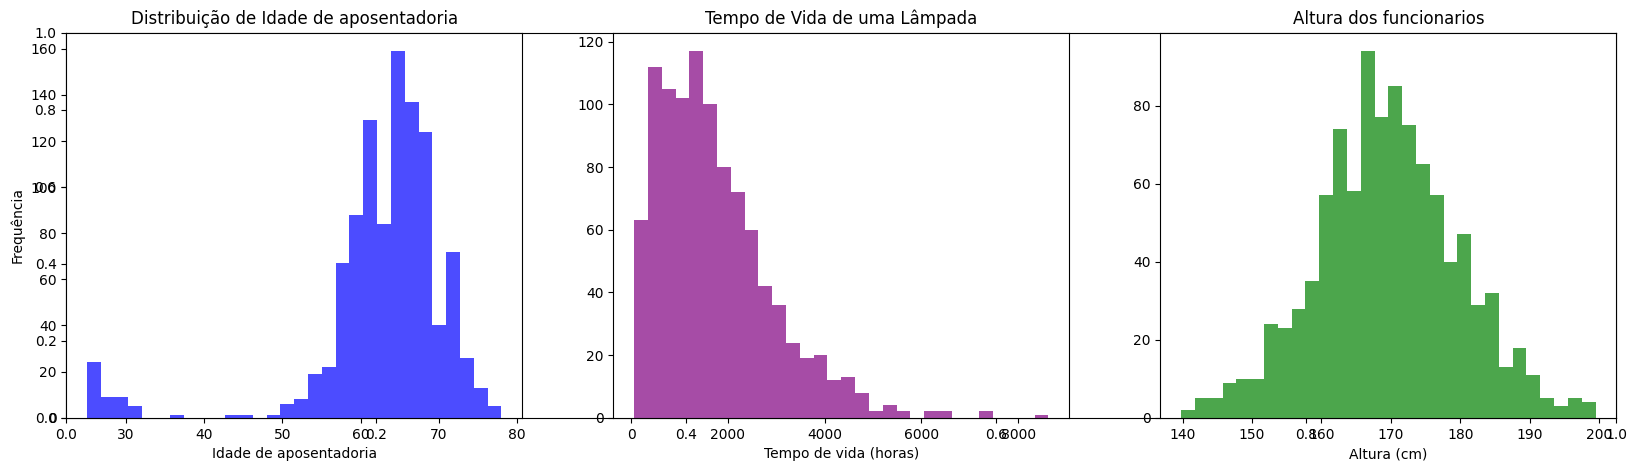

In [5]:
plt.subplots(figsize=(20,5))
plt.subplot(131)
plt.title('Distribuição de Idade de aposentadoria')
plt.xlabel('Idade de aposentadoria')
plt.ylabel('Frequência')
plt.hist(dados_idade_aposentadoria, bins=30 , alpha=0.7, color= 'blue')


plt.subplot(132)
plt.title('Tempo de Vida de uma Lâmpada')
plt.xlabel('Tempo de vida (horas)')
plt.hist(dados_vida_lampada, bins=30 , alpha=0.7, color= 'purple')

plt.subplot(133)
plt.title('Altura dos funcionarios')
plt.xlabel('Altura (cm)')
plt.hist(dados_alturas, bins=30 , alpha=0.7, color= 'green')


plt.show()




O código plt.subplot(131) é usado no Matplotlib para criar uma grade de subplots (múltiplos gráficos) dentro de uma única figura.

Vamos quebrar o significado dos números:
1: Indica o número de linhas na grade de subplots. Neste caso, há 1 linha.
3: Indica o número de colunas na grade de subplots. Neste caso, há 3 colunas.
1: Indica o índice do subplot atual. Neste caso, é o primeiro subplot na grade. Os índices começam em 1 e aumentam da esquerda para a direita e de cima para baixo.

Então, plt.subplot(131) cria uma grade de 1 linha por 3 colunas e ativa o primeiro subplot para que você possa plotar nele. Se você quisesse plotar no segundo subplot da mesma grade, usaria plt.subplot(132), e assim por diante.



In [6]:
#reamostragem

#tamanho da amostra
n=100

#quantidade de amostras
qnt=10000

#função de reamostragem e calculo de médias
def reamostragem_medias(dados, coluna,n, qnt):
  medias = [dados[coluna].sample(n, replace = True).mean() for _ in range(qnt)]
  return medias

Reamostragem" (Resampling em inglês) é um termo genérico que se refere a diversas técnicas utilizadas em estatística e aprendizado de máquina para extrair amostras repetidamente de um conjunto de dados existente.

Em resumo, a reamostragem é uma ferramenta poderosa e versátil que permite aos estatísticos e cientistas de dados explorar a variabilidade dos dados, testar hipóteses, validar modelos e lidar com desafios específicos, como o desequilíbrio de classes, de forma mais robusta e eficiente.

In [7]:
dados_idade_aposentadoria.head()#para saber o nome da coluna

,idade
0,66
1,66
2,60
3,61
4,57


In [8]:
dados_vida_lampada.head() #para saber o nome da coluna

,duracao
0,2238.462196
1,404.474833
2,358.025869
3,2193.463611
4,1072.377941


In [9]:
dados_alturas.head() #para saber o nome da coluna

,alturas
0,167.52
1,185.21
2,172.74
3,171.52
4,157.75


In [10]:
#realizando a reamostragem com função

media_idade= reamostragem_medias(dados_idade_aposentadoria, 'idade', n, qnt)
media_duracao = reamostragem_medias(dados_vida_lampada, 'duracao', n, qnt)
media_altura = reamostragem_medias(dados_alturas, 'alturas', n, qnt)



In [11]:
print('***** Medias populacionais *****')

print('idade',dados_idade_aposentadoria['idade'].mean())
print('duracao',dados_vida_lampada['duracao'].mean())
print('alturas',dados_alturas['alturas'].mean())

***** Medias populacionais *****
idade 62.70857142857143
duracao 1731.8036029420002
alturas 169.52022


In [12]:
#medias amostrais
def Average(list):
  return sum(list) / len(list)

print('***** Medias populacionais *****')

print('idade',Average(media_idade))
print('duracao',Average(media_duracao))
print('alturas',Average(media_altura))



***** Medias populacionais *****
idade 62.717881999999996
duracao 1732.576697085079
alturas 169.50231473999986


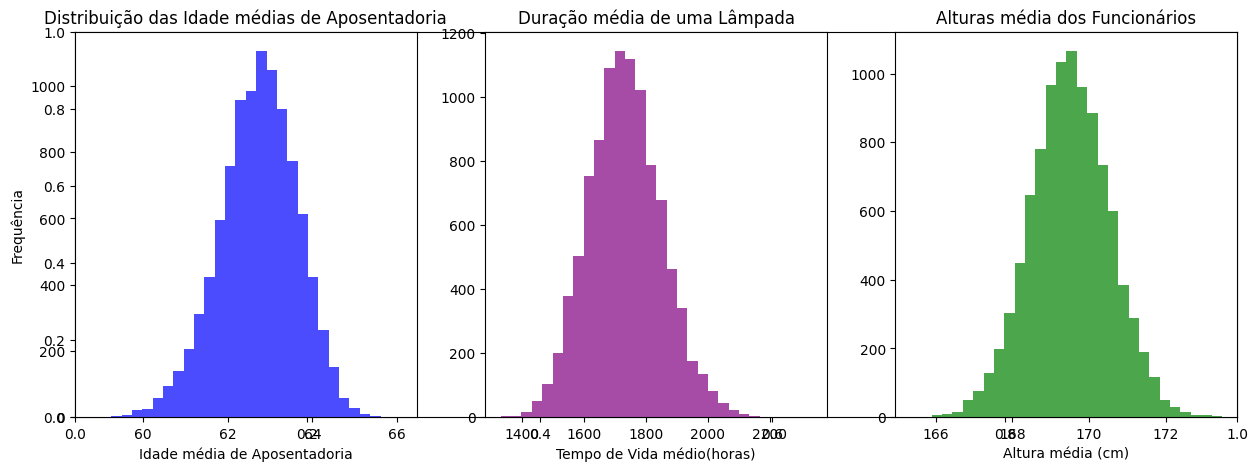

In [13]:
#como as medias estão distribuidas?

plt.subplots(figsize=(15, 5))
plt.subplot(131)
plt.title('Distribuição das Idade médias de Aposentadoria')
plt.xlabel('Idade média de Aposentadoria')
plt.ylabel('Frequência')
plt.hist(media_idade, bins=30, alpha=0.7, color='blue')

plt.subplot(132)
plt.hist(media_duracao, bins=30, alpha=0.7, color='purple')
plt.title('Duração média de uma Lâmpada')
plt.xlabel('Tempo de Vida médio(horas)')

plt.subplot(133)
plt.hist(media_altura, bins=30, alpha=0.7, color='green')
plt.title('Alturas média dos Funcionários')
plt.xlabel('Altura média (cm)')

plt.show()

teorema do limite central. Esse teorema é famoso na estatística para fazermos inferências, ou seja, generalizar a partir de uma amostra para uma população.


In [16]:
# média da nova amostra
media_nova_amostra = 1200

In [17]:
# media original
media_populacional = dados_vida_lampada['duracao'].mean()

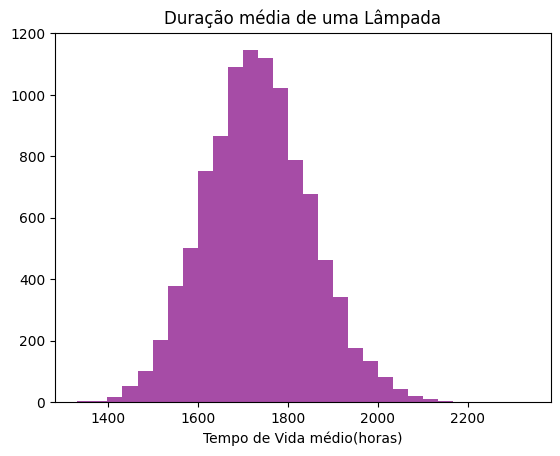

In [18]:
# Quão distante essa média está do comportamento?

plt.hist(media_duracao, bins=30, alpha=0.7, color='purple')
plt.title('Duração média de uma Lâmpada')
plt.xlabel('Tempo de Vida médio(horas)')
plt.annotate('.', xy=(media_nova_amostra, 0), xytext=(media_nova_amostra, 100), fontsize=8,
            arrowprops=dict(facecolor='green'))
plt.show()

In [19]:
# transformando medias_duração em DataFrame
duracao_amostras = pd.DataFrame({'medias_duracao': media_duracao})

In [20]:
# calculando informações
media_das_medias = duracao_amostras['medias_duracao'].mean()
EP = duracao_amostras['medias_duracao'].std()

print("*****  Medidas amostrais *****")
print("média:", media_das_medias )
print("Erro Padrão:", EP )

*****  Medidas amostrais *****
média: 1732.5766970850727
Erro Padrão: 117.8088639542764


In [21]:
# Quantos erros?
1732 - EP

1614.1911360457236

In [22]:
# Quantos erros?
1732 - 3*EP

1378.5734081371706

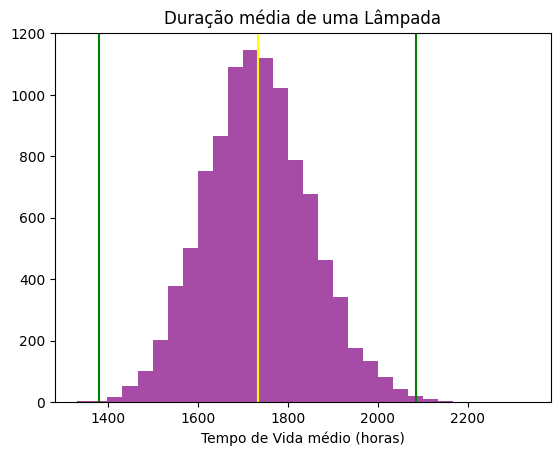

In [25]:
# Visualizando a quantidade de amostras entre 3EP +- da média.

plt.hist(media_duracao, bins=30, alpha=0.7, color='purple')
plt.title('Duração média de uma Lâmpada')
plt.xlabel('Tempo de Vida médio (horas)')
plt.axvline(media_das_medias, color = "yellow")#colocando a linha (media) no grafico
plt.axvline(media_das_medias + 3*EP , color = "green")#colocando a linha (erro padrao) no grafico
plt.axvline(media_das_medias - 3*EP , color = "green")#colocando a linha (erro padrao) no grafico
plt.annotate('.', xy=(media_nova_amostra, 0), xytext=(media_nova_amostra, 100), fontsize=8,
            arrowprops=dict(facecolor='green'))
plt.show()

In [29]:
#quanto está no intervalo de +ou- dois desvio
qnt_obs = duracao_amostras[(duracao_amostras > media_das_medias - 3*EP) &
                          (duracao_amostras < media_das_medias + 3*EP)]


In [30]:
# quanto isso representa?
qnt_obs.count()/duracao_amostras.count()


,0
medias_duracao,0.9971


In [31]:
# quanto isso representa?
qnt_obs.count()/duracao_amostras.count()*100

,0
medias_duracao,99.71
